In [11]:
# import data
import pandas as pd
train_path = 'train.csv'
train_data = pd.read_csv(train_path)
train_data = pd.get_dummies(train_data)
X = train_data.drop('SalePrice', axis=1)
X = X.dropna(axis=1)
y=train_data["SalePrice"]

In [20]:
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.feature_selection import RFE
from sklearn import model_selection

## 递归特征消除

In [ ]:
# select 100 feature
selector = RFE(estimator = rf(), n_features_to_select=100,step=10)
X_s = selector.fit_transform(X,y)
X_s.shape

- 检验特征选择效果

In [31]:
# compare effect
from sklearn.model_selection import KFold, cross_val_score

In [33]:
model = rf(criterion='squared_error', max_depth=None, max_leaf_nodes=None, random_state=2)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=k_fold)
print(mae_scores)
absolute_mae_scores = -mae_scores
average_mae = absolute_mae_scores.mean()
print("Average MAE:", average_mae)

[-17377.4860274  -17353.02606164 -21381.26688356 -18290.2564726
 -15319.17842466]
Average MAE: 17944.242773972604


In [34]:
model = rf(criterion='squared_error', max_depth=None, max_leaf_nodes=None, random_state=2)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = cross_val_score(model, X_s, Y, scoring='neg_mean_absolute_error', cv=k_fold)
print(mae_scores)
absolute_mae_scores = -mae_scores
average_mae = absolute_mae_scores.mean()
print("Average MAE:", average_mae)

[-17356.13726027 -16935.24291096 -21188.18294521 -18096.56284247
 -15172.15571918]
Average MAE: 17749.656335616437


## 交叉验证递归特性消除

In [21]:
# CV -> select ? features
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator = rf(), step = 1, min_features_to_select = 1, cv = KFold(5), scoring = "r2")
rfecv.fit(X,y)
print(rfecv.n_features_)

79


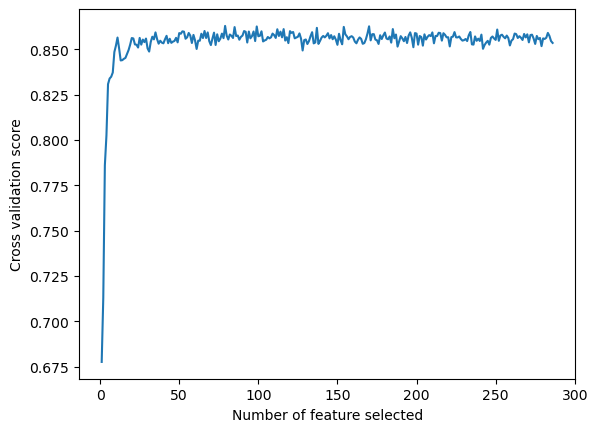

In [24]:
import matplotlib.pyplot as plt
plt.figure
plt.xlabel("Number of feature selected")
plt.ylabel("Cross validation score")
plt.plot(range(1,len(rfecv.cv_results_["mean_test_score"])+1,1),rfecv.cv_results_["mean_test_score"])

In [3]:
import joblib

In [26]:
joblib.dump(rfecv,'rfecv_rf_111.pkl',compress = 3)

['rfecv_rf_111.pkl']

In [13]:
rel_rfecv = joblib.load('rfecv_rf_111.pkl')